In [57]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import re
import nltk
from nltk.corpus import stopwords
import unicodedata
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
import datasets 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn import svm
from time import time
from pandas import DataFrame
from pathlib import Path

from sklearn.model_selection import GridSearchCV

from nltk.sentiment import SentimentIntensityAnalyzer




In [59]:
# This is a dataset for classification that has been generated by some experts as part of the dynabench project: https://dynabench.org/tasks/hs and https://arxiv.org/abs/2012.15761
data_gen=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/Dynamically-Generated-Hate-Speech-Dataset-main/Dynamically Generated Hate Dataset v0.2.3.csv",index_col=0)
data_gen.head()


,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [60]:
#data_gen = data_gen.drop(columns=['acl.id', 'X1','round.base','annotator','round','acl.id.matched'], axis=1)
#data_gen_2_combine = data_gen.drop(columns=[ 'type','target','level','split'], axis=1)
#data_gen_2_combine.columns = ['text', 'label']
#data_gen_2_combine.label.value_counts()

In [61]:
#re labelling 1 as hate speech to combine 
#data_gen_2_combine = data_gen_2_combine.replace({'label': {'hate': 1, 'nothate': 0}})
#data_gen_2_combine.label.value_counts()

In [62]:
# this a dataset that has been collated from three other sources from: https://towardsdatascience.com/how-to-create-your-own-hate-tweet-detector-704508c34cd0
#data_comb=pd.read_csv("Data/combined.csv", index_col=0)
#data_comb.head()

In [63]:
# combining the compiled dataset and the one from towardsdatascience
#combined = pd.concat([data_comb, data_gen_2_combine], ignore_index=1)
#combined.label.value_counts()
#combined.to_csv('/Users/rebeccaharrison/Documents/Python/Bootcamp/Data/combined_final.csv') 

In [64]:
# preaparing dataset for analysis with different types of hate speech
data_gen['target'].value_counts()
data_gen["target"] = data_gen["target"].fillna("")

# Creating variables that define target based on religion
data_gen['Religion']=0
data_gen.loc[data_gen['target'].str.contains('jew'), 'Religion'] = 1 # -> Jewish people
data_gen.loc[data_gen['target'].str.contains('mus'), 'Religion'] = 1 # -> Muslims
data_gen.loc[data_gen['target'].str.contains('muswom'), 'Religion'] = 1 # -> Jewish people
data_gen['Jewish people']=0 # -> Jewish people
data_gen.loc[data_gen['target'].str.contains('jew'), 'Jewish people'] = 1 # -> Jewish people
data_gen['Muslims']=0 # -> Muslims
data_gen.loc[data_gen['target'].str.contains('mus'), 'Muslims'] = 1 # -> Muslims
data_gen['Muslim women']=0 # -> Muslim women
data_gen.loc[data_gen['target'].str.contains('muswom'), 'Muslim women'] = 1 # -> Muslim women

#creating a class based variable (removed due to lack of data)
#data_gen['Class']=0 # -> Working class people
#data_gen.loc[data_gen['target'].str.contains('working'), 'Class'] = 1

# Creating an ageist classification
data_gen['Oldist']=0 # -> Elderly people
data_gen.loc[data_gen['target'].str.contains('old'), 'Oldist'] = 1

# Support of hate groups variable
data_gen['Support']=0
data_gen.loc[data_gen['target'].str.contains('nazi'), 'Support'] = 1
data_gen.loc[data_gen['target'].str.contains('hitler'), 'Support'] = 1

# Creating an immigration status based variable
data_gen['Immigration status']=0
data_gen.loc[data_gen['target'].str.contains('immig'), 'Immigration status'] = 1 # -> Immigrants
data_gen.loc[data_gen['target'].str.contains('asylum'), 'Immigration status'] = 1  # -> Asylum seekers
data_gen.loc[data_gen['target'].str.contains('ref'), 'Immigration status'] = 1 # -> Refugees
data_gen.loc[data_gen['target'].str.contains('for'), 'Immigration status'] = 1  # -> Foreigners

# creating an ableness target based variable
data_gen['Ableness / disability']=0
data_gen.loc[data_gen['target'].str.contains('dis'), 'Ableness / disability'] = 1  # -> People with disabilities

# Creating variables that define target based on gender
data_gen['Gender']=0
data_gen.loc[data_gen['target'].str.contains('muswom'), 'Gender'] = 1 # -> Muslim women
data_gen.loc[data_gen['target'].str.contains('indigwom'), 'Gender'] = 1 # -> Indigenous Women
data_gen.loc[data_gen['target'].str.contains('wom'), 'Gender'] = 1 # -> Women
data_gen.loc[data_gen['target'].str.contains('blawom'), 'Gender'] = 1 # -> Black women
data_gen.loc[data_gen['target'].str.contains('blaman'), 'Gender'] = 1 # -> Black men
data_gen.loc[data_gen['target'].str.contains('trans'), 'Gender'] = 1 # -> Trans people
data_gen.loc[data_gen['target'].str.contains('gendermin'), 'Gender'] = 1 # -> Gender minorities,
data_gen.loc[data_gen['target'].str.contains('asiwom'), 'Gender'] = 1 # -> Asian women

data_gen['Indigenous Women']=0 # -> Indigenous Women
data_gen.loc[data_gen['target'].str.contains('indigwom'), 'Indigenous Women'] = 1 # -> Indigenous Women
data_gen['Women']=0 # -> Women 
data_gen.loc[data_gen['target'].str.contains('wom'), 'Women'] = 1 # -> Women
data_gen['Black women']=0 # -> Black women
data_gen.loc[data_gen['target'].str.contains('blawom'), 'Black women'] = 1 # -> Black women
data_gen['Black men']=0 # -> Black men
data_gen.loc[data_gen['target'].str.contains('blaman'), 'Black men'] = 1 # -> Black men
data_gen['Trans people']=0 # -> Trans people
data_gen.loc[data_gen['target'].str.contains('trans'), 'Trans people'] = 1 # -> Trans people
data_gen['Gender minorities']=0 # -> Gender minorities, 
data_gen.loc[data_gen['target'].str.contains('gendermin'), 'Gender minorities'] = 1 # -> Gender minorities,
data_gen['Asian women']=0 # -> Asian women
data_gen.loc[data_gen['target'].str.contains('asiwom'), 'Asian women'] = 1 # -> Asian women

# Creating variables based on sexuality and sexual preference
data_gen['Sexuality and Sexual preference']=0
data_gen.loc[data_gen['target'].str.contains('bis'), 'Sexuality and Sexual preference'] = 1 # -> Bisexual
data_gen.loc[data_gen['target'].str.contains('gay'), 'Sexuality and Sexual preference'] = 1 # -> Gay people (both men and women)
data_gen.loc[data_gen['target'].str.contains('gayman'), 'Sexuality and Sexual preference'] = 1 # -> Gay men
data_gen.loc[data_gen['target'].str.contains('gaywom'), 'Sexuality and Sexual preference'] = 1 # -> Lesbians 

data_gen['Bisexual']=0 # -> Bisexual
data_gen.loc[data_gen['target'].str.contains('bis'), 'Bisexual'] = 1 # -> Bisexual
data_gen['Gay']=0 # -> Gay people (both men and women)
data_gen.loc[data_gen['target'].str.contains('gay'), 'Gay'] = 1 # -> Gay people (both men and women)
data_gen['Gay men']=0 # -> Gay men
data_gen.loc[data_gen['target'].str.contains('gayman'), 'Gay men'] = 1 # -> Gay men
data_gen['Gay women']=0 # -> Lesbians    
data_gen.loc[data_gen['target'].str.contains('gaywom'), 'Gay women'] = 1 # -> Lesbians 



# Creating an ethnicity based variable
data_gen['Ethnicity/Race']=0
data_gen.loc[data_gen['target'].str.contains('mixed'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('ethnic minority'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('indig'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('non-white'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('trav'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('african'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('asi'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('east'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('south'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('chinese'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('pak'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('arab'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('eastern european'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('russian'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('pol'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('hispanic'), 'Ethnicity/Race'] = 1
data_gen.loc[data_gen['target'].str.contains('bla'), 'Black people'] = 1

# Creating a black race based variable
data_gen['Black people']=0
data_gen.loc[data_gen['target'].str.contains('bla'), 'Black people'] = 1
data_gen.loc[data_gen['target'].str.contains('african'), 'Black people'] = 1

# Creating other race or ethnicity based individual variables
data_gen['Asian']=0 # -> Asians
data_gen.loc[data_gen['target'].str.contains('asi'), 'Asian'] = 1
data_gen['East asian']=0 # -> East Asians
data_gen.loc[data_gen['target'].str.contains('east'), 'East asian'] = 1
data_gen['South Asians']=0 # -> South Asians (e.g. Indians)
data_gen.loc[data_gen['target'].str.contains('south'), 'South Asian'] = 1
data_gen['Chinese']=0 # -> Chinese people
data_gen.loc[data_gen['target'].str.contains('chinese'), 'Chinese'] = 1
data_gen['Pakistani']=0 # -> Pakistanis
data_gen.loc[data_gen['target'].str.contains('pak'), 'Pakistani'] = 1
data_gen['Arab']=0 # -> Arabs, including people from the Middle East
data_gen.loc[data_gen['target'].str.contains('arab'), 'Arab'] = 1
data_gen['Eastern European']=0 # -> Eastern Europeans
data_gen.loc[data_gen['target'].str.contains('eastern european'), 'Eastern European'] = 1
data_gen['Russian']=0 # -> Russian people
data_gen.loc[data_gen['target'].str.contains('russian'), 'Russian'] = 1
data_gen['Polish']=0 # -> Polish people
data_gen.loc[data_gen['target'].str.contains('pol'), 'Polish'] = 1
data_gen['Hispanic']=0 # -> Hispanic people, including latinx and Mexicans
data_gen.loc[data_gen['target'].str.contains('hispanic'), 'Hispanic'] = 1

data_gen['Mixed race']=0 #-> Mixed race background
data_gen.loc[data_gen['target'].str.contains('mixed'), 'Mixed race'] = 1
data_gen['Ethnic minority']=0 # -> Ethnic Minorities
data_gen.loc[data_gen['target'].str.contains('ethnic minority'), 'Ethnic minority'] = 1
data_gen['Indigenous people']=0 # -> Indigenous people
data_gen.loc[data_gen['target'].str.contains('indig'), 'Indigenous people'] = 1

data_gen['Non-white']=0 # -> Non-whites (attacked as 'non-whites', rather than specific non-white groups which are generally addressed separately)
data_gen.loc[data_gen['target'].str.contains('non-white'), 'Non-white'] = 1
data_gen['Traveller']=0 # -> Travellers (including Roma, gypsies)
data_gen.loc[data_gen['target'].str.contains('trav'), 'Traveller'] = 1


data_gen.head()

,acl.id,X1,text,label,type,target,level,split,round.base,annotator,...,Arab,Eastern European,Russian,Polish,Hispanic,Mixed race,Ethnic minority,Indigenous people,Non-white,Traveller
1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0,0,0,0
2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0,0,0,0
3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,...,0,0,0,0,0,0,0,0,0,0
4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,...,0,0,0,0,0,0,0,0,0,0
5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# removing stopwords from text

# Get a list of stopwords in English
stopwords = stopwords.words('english')

# Remove stopwords from the 'text' column in the dataframe
data_gen['text_nostop'] = data_gen['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
data_gen.head()

,acl.id,X1,text,label,type,target,level,split,round.base,annotator,...,Eastern European,Russian,Polish,Hispanic,Mixed race,Ethnic minority,Indigenous people,Non-white,Traveller,text_nostop
1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0,0,0,dalits lowlives
2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0,0,0,gay people burden society
3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,...,0,0,0,0,0,0,0,0,0,Arabs welcome
4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,...,0,0,0,0,0,0,0,0,0,I'm saying actually eliminate heebs.. I wish n...
5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,...,0,0,0,0,0,0,0,0,0,bananas black people


In [66]:
data_gen = data_gen.replace({'label': {'hate': 1, 'nothate': 0}})
data_gen = data_gen.rename(columns={'label':'Hate speech'})



In [104]:
# these are the hate words
search_words = pd.read_csv('/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/Dynamically-Generated-Hate-Speech-Dataset-main/hurtlex-master/lexica/EN/1.2/hurtlex_EN.tsv', sep='\t')

categories=search_words['category'].unique()
categories
search_words.head()

# count the number of times words from the hurtlex appear

# by category
for cat in categories:
    word_list="(" + "|".join(list(search_words['lemma'].loc[search_words['category']==cat])) + ")"
    data_gen[cat] = data_gen['text_nostop'].str.count(word_list)

# overall
words="(" + "|".join(list(search_words['lemma'])) + ")"
data_gen['hurtlex'] = data_gen['text_nostop'].str.count(words)
data_gen['hurtlex'].head()





1    1
2    2
3    0
4    0
5    2
Name: hurtlex, dtype: int64

In [106]:
data_gen

,acl.id,X1,text,Hate speech,type,target,level,split,round.base,annotator,...,ps,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound
1,acl1,1,dalits are lowlives,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,1,0,0.756,0.244,0.000,-0.4767
2,acl10,2,gay people are a burden to our society,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,2,0,0.492,0.508,0.000,-0.4404
3,acl100,3,Arabs are not welcome,1,notgiven,notgiven,original,train,1,vDe7GN0NrL,...,0,0,0,0,0,1,0.000,0.250,0.750,0.4588
4,acl1000,4,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,1,oemYWm1Tjg,...,0,0,0,0,0,2,0.000,0.748,0.252,0.4019
5,acl10000,5,bananas are for black people,1,notgiven,notgiven,original,test,1,QiOKkCi7F8,...,1,0,0,0,2,0,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117100,acl9974,41228,Indian culture is so backwards,1,notgiven,notgiven,original,test,1,GNZuCtwed3,...,0,0,0,0,0,1,0.000,1.000,0.000,0.0000
118100,acl11574,1752,"Women don't want equality, they just want to b...",1,derogation,wom,original,train,2,CAgNlUizNm,...,0,0,0,0,0,1,0.000,0.536,0.464,0.1531
119100,acl13446,3832,fuck covid,0,none,none,original,train,2,CAgNlUizNm,...,0,0,0,0,1,0,0.778,0.222,0.000,-0.5423
1205,acl13457,3844,This computer is garbage,0,none,none,original,train,2,eLGzdD8Tvb,...,0,0,0,0,1,1,0.000,1.000,0.000,0.0000


In [68]:
# count capital letters
data_gen['capital_letters'] = data_gen['text_nostop'].str.findall(r'[A-Z]').str.len()
data_gen['capital_letters']
data_gen.head()

,acl.id,X1,text,Hate speech,type,target,level,split,round.base,annotator,...,pr,dmc,asf,ddp,ps,pa,rci,ddf,hurtlex,capital_letters
1,acl1,1,dalits are lowlives,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,1,0,0,0,0,0,0,0,0
2,acl10,2,gay people are a burden to our society,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0,0,0,0
3,acl100,3,Arabs are not welcome,1,notgiven,notgiven,original,train,1,vDe7GN0NrL,...,0,0,0,0,0,0,0,0,0,1
4,acl1000,4,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,1,oemYWm1Tjg,...,0,0,0,0,0,0,0,0,0,2
5,acl10000,5,bananas are for black people,1,notgiven,notgiven,original,test,1,QiOKkCi7F8,...,0,1,0,0,1,0,0,0,0,0


In [69]:
sia=SentimentIntensityAnalyzer()

In [70]:
# run sentiment analyser from NLTK
data_gen['polarity'] = data_gen['text_nostop'].apply(lambda x: sia.polarity_scores(str(x)))
# Change data structure so its not nested
data_gen = pd.concat(
    [data_gen.drop([
       'polarity'], axis=1), 
     data_gen['polarity'].apply(pd.Series)], axis=1)
data_gen.head()

,acl.id,X1,text,Hate speech,type,target,level,split,round.base,annotator,...,ps,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound
1,acl1,1,dalits are lowlives,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0.756,0.244,0.000,-0.4767
2,acl10,2,gay people are a burden to our society,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0.492,0.508,0.000,-0.4404
3,acl100,3,Arabs are not welcome,1,notgiven,notgiven,original,train,1,vDe7GN0NrL,...,0,0,0,0,0,1,0.000,0.250,0.750,0.4588
4,acl1000,4,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,1,oemYWm1Tjg,...,0,0,0,0,0,2,0.000,0.748,0.252,0.4019
5,acl10000,5,bananas are for black people,1,notgiven,notgiven,original,test,1,QiOKkCi7F8,...,1,0,0,0,0,0,0.000,1.000,0.000,0.0000


In [ ]:
data_gen.to_csv('prepared_hate_data_train.csv')

In [72]:
train=data_gen.loc[data_gen['split']=="train"]
test=data_gen.loc[data_gen['split']=="test"]
X_hate_train = train.text_nostop
y_hate_train = train['Hate speech']

X_hate_test = test.text_nostop
y_hate_test = test['Hate speech']

outcome_variables= ['Hate speech','Religion','Ethnicity/Race','Gender','Sexuality and Sexual preference','Ableness / disability','Immigration status']


In [73]:
train_type_only=train.loc[data_gen['target']!="notgiven"]
test_type_only=test.loc[data_gen['target']!="notgiven"]

# train datasets for specific type of hate
X_type_train = train_type_only.text
y_religion_train = train_type_only.Religion

y_ethnicity_train = train_type_only['Ethnicity/Race'] # 2307

y_gender_train = train_type_only['Gender'] # 3312

y_sexuality_train = train_type_only['Sexuality and Sexual preference'] # 1245 pos

y_disability_train = train_type_only['Ableness / disability'] # 438 pos results

#y_support_train = train_type_only['Support'] # only 88 so will not include

y_immigration_train = train_type_only['Immigration status'] # 1254 pos results

#y_ageism_train = train_type_only['Oldist'] # only 18 positive likely too few

#y_class_train = train_type_only['Class'] # no data, not to be used

# test data
X_type_test = test_type_only.text
y_religion_test = test_type_only.Religion # 244 positive results

y_ethnicity_test = test_type_only['Ethnicity/Race'] # 333 positive results

y_gender_test = test_type_only['Gender'] # 373 positive results

y_sexuality_test = test_type_only['Sexuality and Sexual preference'] # 147 positive results

y_disability_test = test_type_only['Ableness / disability'] # 79 positive results

#y_support_test = test_type_only['Support'] # only 15 may be removable

y_immigration_test = test_type_only['Immigration status'] #165 positive reulsts

#y_ageism_test = test_type_only['Oldist'] # very little data here (5 pos results) - may be too few

#y_class_test = test_type_only['Class'] # no positive results so will not use

In [74]:
y_religion_train.value_counts()

0    25223
1     2033
Name: Religion, dtype: int64

In [77]:
# importing and preparing the twitter and reddit data sets for analysis
twitter=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/twitter_clean.csv")
twitter=twitter.dropna(subset=['text_nostop'])
twitter_text=twitter.text_nostop
reddit=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/reddit_clean.csv")
reddit=reddit.dropna(subset=['text_nostop'])
reddit_text=reddit.text_nostop




/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_14274/2146898623.py:2: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/twitter_clean.csv")


In [79]:
tfidf_vect = TfidfVectorizer(analyzer='char_wb', ngram_range=(1,4))
# run term frequence inverse document frequency
# first on the overall hate dataset
tfidf_train = tfidf_vect.fit_transform(X_hate_train)
tfidf_test = tfidf_vect.transform(X_hate_test)
twitter_test = tfidf_vect.transform(twitter_text)
reddit_test = tfidf_vect.transform(reddit_text)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

# then just on the type dataset
tfidf_type_train = tfidf_vect.fit_transform(X_type_train)
tfidf_type_test = tfidf_vect.transform(X_type_test)
tfidf_test_df = pd.DataFrame(tfidf_type_train.A, columns=tfidf_vect.get_feature_names())




twitter_test 

<175447x68861 sparse matrix of type '<class 'numpy.float64'>'
	with 22831265 stored elements in Compressed Sparse Row format>

In [91]:
extra_train=train[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']].to_numpy()

extra_test=test[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']].to_numpy()

tfidf__train_array=tfidf_train.to_numpy()
tfidf_test_array=tfidf_test.to_numpy()

extra_train=np.hstack((tfidf__train_array,extra_train))
extra_train=np.hstack((tfidf_test_array,extra_test))

AttributeError: to_numpy not found

In [105]:
train

,acl.id,X1,text,Hate speech,type,target,level,split,round.base,annotator,...,ps,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound
1,acl1,1,dalits are lowlives,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0.756,0.244,0.000,-0.4767
2,acl10,2,gay people are a burden to our society,1,notgiven,notgiven,original,train,1,GNZuCtwed3,...,0,0,0,0,0,0,0.492,0.508,0.000,-0.4404
3,acl100,3,Arabs are not welcome,1,notgiven,notgiven,original,train,1,vDe7GN0NrL,...,0,0,0,0,0,1,0.000,0.250,0.750,0.4588
4,acl1000,4,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,1,oemYWm1Tjg,...,0,0,0,0,0,2,0.000,0.748,0.252,0.4019
15,acl1001,15,It's such a rape culture with these immigrants...,1,notgiven,notgiven,original,train,1,CAgNlUizNm,...,0,0,0,0,0,1,0.610,0.390,0.000,-0.8860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107100,acl8894,40028,Women are deceitful,1,notgiven,notgiven,original,train,1,CAgNlUizNm,...,0,0,0,0,0,1,0.744,0.256,0.000,-0.4404
118100,acl11574,1752,"Women don't want equality, they just want to b...",1,derogation,wom,original,train,2,CAgNlUizNm,...,0,0,0,0,0,1,0.000,0.536,0.464,0.1531
119100,acl13446,3832,fuck covid,0,none,none,original,train,2,CAgNlUizNm,...,0,0,0,0,0,0,0.778,0.222,0.000,-0.5423
1205,acl13457,3844,This computer is garbage,0,none,none,original,train,2,eLGzdD8Tvb,...,0,0,0,0,0,1,0.000,1.000,0.000,0.0000


In [99]:
X_hate_test.info()


<class 'pandas.core.series.Series'>
Int64Index: 4120 entries, 5 to 117100
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
4120 non-null   object
dtypes: object(1)
memory usage: 64.4+ KB


In [16]:
# on logistic regression on hate speech
print("Results for logistic regression on all hate speech")
logregression = LogisticRegression(random_state=0,solver='liblinear')
logregression.fit(tfidf_train,y_hate_train)
y_pred_test1 = logregression.predict(tfidf_test)
y_pred_train1 = logregression.predict(tfidf_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))
print(y_hate_test)
print(y_pred_test1)

Results for logistic regression on all hate speech
Accuracy on training data:
[[10650  4534]
 [ 3573 14167]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     15184
           1       0.76      0.80      0.78     17740

    accuracy                           0.75     32924
   macro avg       0.75      0.75      0.75     32924
weighted avg       0.75      0.75      0.75     32924

Accuracy on test data:
[[1090  762]
 [ 676 1592]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      1852
           1       0.68      0.70      0.69      2268

    accuracy                           0.65      4120
   macro avg       0.65      0.65      0.65      4120
weighted avg       0.65      0.65      0.65      4120

5         1
6         0
7         1
8         0
9         1
         ..
113100    1
11414     1
115100    1
116100    0
117100    1
Name: Hate speech, Length: 4120, dtype: int64
[1 1 1 ..

In [109]:
# on support vector machine on hate speech
print("Results for support vector classification on all hate speech")
svc = svm.SVC()
svc.fit(tfidf_train,y_hate_train)
y_pred_test1 = svc.predict(tfidf_test)
y_pred_train1 = svc.predict(tfidf_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))
print(y_hate_test)
print(y_pred_test1)



Results for support vector classification on all hate speech


In [ ]:
# on support vector machine on hate speech
print("Results for support vector classification on all hate speech")
dtc = DecisionTreeClassifier()
dtc.fit(tfidf_train,y_hate_train)
y_pred_test1 = dtc.predict(tfidf_test)
y_pred_train1 = dtc.predict(tfidf_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))
print(y_hate_test)
print(y_pred_test1)


In [ ]:
# on logistic regression on hate speech with added sentiment analysis, capital letters and hurtlex counts
print("Results for logistic regression on all hate speech")
logregression = LogisticRegression(random_state=0,solver='liblinear')
logregression.fit(extra_train,y_hate_train)
y_pred_test10 = logregression.predict(extra_test)
y_pred_train10 = logregression.predict(extra_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train10))
print(classification_report(y_hate_train,y_pred_train10))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test10))
print(classification_report(y_hate_test,y_pred_test10))


In [17]:
# Random forest classifier for overall hate speech
Rando = RandomForestClassifier(n_estimators=35,random_state=0)
print("Results for Random forest regression on overall hate speech")
Rando.fit(tfidf_train,y_hate_train)
y_pred_test1 = Rando.predict(tfidf_test)
y_pred_train1 = Rando.predict(tfidf_train)
print("Accuracy on hate speech training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on hate speech test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))

Results for Random forest regression on overall hate speech
Accuracy on hate speech training data:
[[15171    13]
 [    5 17735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15184
           1       1.00      1.00      1.00     17740

    accuracy                           1.00     32924
   macro avg       1.00      1.00      1.00     32924
weighted avg       1.00      1.00      1.00     32924

Accuracy on hate speech test data:
[[ 715 1137]
 [ 918 1350]]
              precision    recall  f1-score   support

           0       0.44      0.39      0.41      1852
           1       0.54      0.60      0.57      2268

    accuracy                           0.50      4120
   macro avg       0.49      0.49      0.49      4120
weighted avg       0.50      0.50      0.50      4120



In [18]:
# Predicting hate speech with logistic regression
y_pred_twitter_logreg = logregression.predict(twitter_test)
y_pred_reddit_logreg = logregression.predict(reddit_test)

# concatenating the results
y_pred_twitter_logreg_df=pd.DataFrame(y_pred_twitter_logreg)
y_pred_twitter_logreg_df.columns=['log_regression']
y_pred_reddit_logreg_df=pd.DataFrame(y_pred_reddit_logreg)
y_pred_reddit_logreg_df.columns=['log_regression']
twitter=pd.concat([twitter,y_pred_twitter_logreg_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_logreg_df],axis=1)

In [ ]:
# Predicting hate speech with decision tree classifier
y_pred_twitter_dtc = dtc.predict(twitter_test)
y_pred_reddit_dtc = dtc.predict(reddit_test)

# concatenating the results
y_pred_twitter_dtc_df=pd.DataFrame(y_pred_twitter_dtc)
y_pred_twitter_dtc_df.columns=['log_regression']
y_pred_reddit_dtc_df=pd.DataFrame(y_pred_reddit_dtc)
y_pred_reddit_dtc_df.columns=['log_regression']
twitter=pd.concat([twitter,y_pred_twitter_dtc_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_dtc_df],axis=1)

In [ ]:
# Predicting hate speech with support vector classification
y_pred_twitter_svc = svc.predict(twitter_test)
y_pred_reddit_svc = svc.predict(reddit_test)

# concatenating the results
y_pred_twitter_svc_df=pd.DataFrame(y_pred_twitter_svc)
y_pred_twitter_svc_df.columns=['log_regression']
y_pred_reddit_svc_df=pd.DataFrame(y_pred_reddit_svc)
y_pred_reddit_svc_df.columns=['log_regression']
twitter=pd.concat([twitter,y_pred_twitter_svc_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_svc_df],axis=1)

In [19]:
# Predicting hate speech with random forest
y_pred_twitter_rando = Rando.predict(twitter_test)
y_pred_reddit_rando = Rando.predict(reddit_test)

# concatenating the results
y_pred_twitter_rando_df=pd.DataFrame(y_pred_twitter_rando)
y_pred_twitter_rando_df.columns=['random_forest']
y_pred_reddit_rando_df=pd.DataFrame(y_pred_reddit_rando)
y_pred_reddit_rando_df.columns=['random_forest']
twitter=pd.concat([twitter,y_pred_twitter_rando_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_rando_df],axis=1)

In [20]:
# MLP neural netowrk
mlp = MLPClassifier(hidden_layer_sizes=(40), activation='logistic', solver='adam', max_iter=500)
mlp.fit(tfidf_train,y_hate_train)
# Neural network on hate speech
predict_train = mlp.predict(tfidf_train)
predict_test = mlp.predict(tfidf_test)
print("Results on training data for Neural network")
print(confusion_matrix(y_hate_train,predict_train))
print(classification_report(y_hate_train,predict_train))
print("Results on test data for Neural network")
print(confusion_matrix(y_hate_test,predict_test))
print(classification_report(y_hate_test,predict_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Results on training data for Neural network
[[15080   104]
 [  273 17467]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15184
           1       0.99      0.98      0.99     17740

    accuracy                           0.99     32924
   macro avg       0.99      0.99      0.99     32924
weighted avg       0.99      0.99      0.99     32924

Results on test data for Neural network
[[1057  795]
 [ 889 1379]]
              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1852
           1       0.63      0.61      0.62      2268

    accuracy                           0.59      4120
   macro avg       0.59      0.59      0.59      4120
weighted avg       0.59      0.59      0.59      4120



In [92]:
tfidf_train

<32924x68861 sparse matrix of type '<class 'numpy.float64'>'
	with 8723323 stored elements in Compressed Sparse Row format>

In [21]:
# Predicting hate speech with a neural network
y_pred_twitter_mlp = mlp.predict(twitter_test)
y_pred_reddit_mlp = mlp.predict(reddit_test)

# concatenating the results
y_pred_twitter_mlp_df=pd.DataFrame(y_pred_twitter_mlp)
y_pred_twitter_mlp_df.columns=['neural_network']
y_pred_reddit_mlp_df=pd.DataFrame(y_pred_reddit_mlp)
y_pred_reddit_mlp_df.columns=['neural_network']
twitter=pd.concat([twitter,y_pred_twitter_mlp_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_mlp_df],axis=1)

In [251]:
twitter

,Unnamed: 0,id,created,text,possibly_sensitive,user,verified,rule,language,text_nostop,...,asf,ddp,ps,pa,rci,ddf,hurtlex,capital_letters,random_forest,neural_network
0,5.0,1.601650e+18,2022-12-10T18:29:58.000Z,WE LOVE LIAM PAYNE 💗\n #EnglandVsFrance #Engla...,False,Judit,False,England France,en,WE LOVE LIAM PAYNE 💗 #EnglandVsFrance #England...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4658,1.0,1.0
1,6.0,1.601650e+18,2022-12-10T18:29:57.000Z,What has Islam got to do with it?,False,Antonio Plescia,False,Worldcup,en,What Islam got it?,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4658,0.0,1.0
2,11.0,1.601650e+18,2022-12-10T18:29:57.000Z,2002. That was also the Cup where Nigeria bo...,False,Shiv Ramdas Traing To Rite Buk,True,England France,en,2002. That also Cup Nigeria bounced Argentina....,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4658,0.0,1.0
3,13.0,1.601650e+18,2022-12-10T18:29:58.000Z,Grant Wahl was a healthy individual just like...,False,Porfirio Diaz,False,Worldcup,en,Grant Wahl healthy individual like many thousa...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4658,0.0,0.0
4,18.0,1.601650e+18,2022-12-10T18:29:58.000Z,#ssfootball France 🇫🇷 2 England 🇬🇧 1,False,Vinny Munda,False,England France,en,#ssfootball France 🇫🇷 2 England 🇬🇧 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4658,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4658,1.0,0.0
166261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4658,1.0,0.0
167266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4658,1.0,0.0
171672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4658,0.0,1.0


In [107]:

categories=search_words['category'].unique()
categories
search_words.head()

# count the number of times words from the hurtlex appear

# by category
for cat in categories:
    word_list="(" + "|".join(list(search_words['lemma'].loc[search_words['category']==cat])) + ")"
    twitter[cat] = twitter['text'].str.count(word_list)

# overall
words="(" + "|".join(list(search_words['lemma'])) + ")"
twitter['hurtlex'] = twitter['text'].str.count(words)
twitter['hurtlex'].head()


0    0
1    2
2    1
3    3
4    2
Name: hurtlex, dtype: int64

In [46]:
# count capital letters
twitter['capital_letters'] = twitter['text_nostop'].str.findall(r'[A-Z]').str.len()
twitter['capital_letters']
twitter.head()


reddit['capital_letters'] = reddit['text_nostop'].str.findall(r'[A-Z]').str.len()
reddit['capital_letters']
reddit.head()

,Unnamed: 0.1,Unnamed: 0,subreddit,created,text,language,text_nostop,log_regression,random_forest,neural_network,...,ps,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound
0,0,0.0,worldcup,1.670707e+09,Exciting! France advances to play against Croa...,en,"Exciting! France advances play Croatia, realit...",0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.000,0.590,0.410,0.7393
1,1,1.0,worldcup,1.670707e+09,Bellingham is good but nothing special. His na...,en,Bellingham good nothing special. His nationali...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.132,0.586,0.281,0.3699
2,2,2.0,worldcup,1.670707e+09,Congratulations to the Budweiser Man of the Ma...,en,"Congratulations Budweiser Man Match, France’s ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.000,0.589,0.411,0.6360
3,3,3.0,worldcup,1.670707e+09,Does google already know final game? Or just a...,en,Does google already know final game? Or typo? ...,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,0.000,1.000,0.000,0.0000
4,4,4.0,worldcup,1.670707e+09,We getting a rematch of 2018 or something diff...,en,We getting rematch 2018 something different?nan,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000,1.000,0.000,0.0000


In [108]:
categories=search_words['category'].unique()
categories
search_words.head()

# count the number of times words from the hurtlex appear

# by category
for cat in categories:
    word_list= words="(" + "|".join(list(search_words['lemma'].loc[search_words['category']==cat])) + ")"
    reddit[cat] = reddit['text'].str.count(word_list)

# overall
words="(" + "|".join(list(search_words['lemma'])) + ")"
reddit['hurtlex'] = reddit['text'].str.count(words)
reddit['hurtlex'].head()



0    3
1    1
2    2
3    3
4    1
Name: hurtlex, dtype: int64

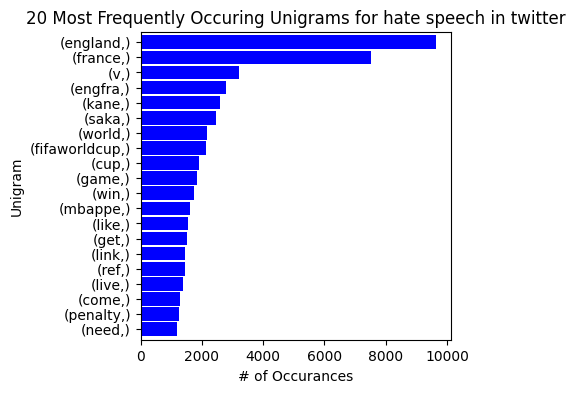

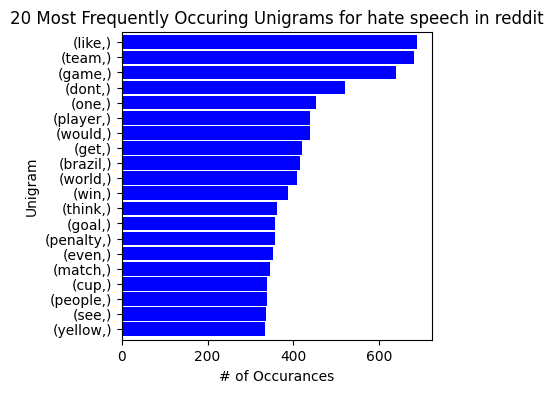

In [244]:
# unigrams in the hate speech detected tweets
hate_words = basic_clean(''.join(str(twitter['text'].loc[twitter['log_regression']==1].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for hate speech in twitter')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(reddit['text'].loc[reddit['log_regression']==1].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for hate speech in reddit')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

In [ ]:
y_pred_twitter.sum()


32971

In [34]:
twitter['text_nostop']

0         WE LOVE LIAM PAYNE 💗 #EnglandVsFrance #England...
1                                        What Islam got it?
2         2002. That also Cup Nigeria bounced Argentina....
3         Grant Wahl healthy individual like many thousa...
4                      #ssfootball France 🇫🇷 2 England 🇬🇧 1
                                ...                        
161878                                                  NaN
166261                                                  NaN
167266                                                  NaN
171672                                                  NaN
172500                                                  NaN
Name: text_nostop, Length: 175490, dtype: object

In [44]:


# run sentiment analyser from NLTK
twitter['polarity'] = twitter['text_nostop'].apply(lambda x: sia.polarity_scores(str(x)))
# Change data structure so its not nested
twitter = pd.concat(
    [twitter.drop([
       'polarity'], axis=1), 
     twitter['polarity'].apply(pd.Series)], axis=1)
twitter.head()
reddit['polarity'] = reddit['text_nostop'].apply(lambda x: sia.polarity_scores(str(x)))
# Change data structure
reddit = pd.concat(
    [reddit.drop([ 'polarity'], axis=1), 
     reddit['polarity'].apply(pd.Series)], axis=1)
reddit
reddit.head()

,Unnamed: 0.1,Unnamed: 0,subreddit,created,text,language,text_nostop,log_regression,random_forest,neural_network,...,ps,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound
0,0,0.0,worldcup,1.670707e+09,Exciting! France advances to play against Croa...,en,"Exciting! France advances play Croatia, realit...",0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,112,0.000,0.590,0.410,0.7393
1,1,1.0,worldcup,1.670707e+09,Bellingham is good but nothing special. His na...,en,Bellingham good nothing special. His nationali...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,112,0.132,0.586,0.281,0.3699
2,2,2.0,worldcup,1.670707e+09,Congratulations to the Budweiser Man of the Ma...,en,"Congratulations Budweiser Man Match, France’s ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,112,0.000,0.589,0.411,0.6360
3,3,3.0,worldcup,1.670707e+09,Does google already know final game? Or just a...,en,Does google already know final game? Or typo? ...,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,112,0.000,1.000,0.000,0.0000
4,4,4.0,worldcup,1.670707e+09,We getting a rematch of 2018 or something diff...,en,We getting rematch 2018 something different?nan,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,112,0.000,1.000,0.000,0.0000


In [47]:
extra_twitter=twitter['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound'].to_numpy()

extra_reddit=reddit['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound'].to_numpy()

extra_twitter=np.vstack((twitter_test,extra_twitter))
extra_reddit=np.vstack((reddit_test,extra_reddit))

In [ ]:
reddit.to_csv('reddit_regression.csv')
twitter.to_csv('twitter_regression.csv')


In [171]:
# logistic regression for Religious hate speech
print("Results for logistic regression on religous hate speech")
logregression.fit(tfidf_type_train,y_religion_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on religion training data:")
print(confusion_matrix(y_religion_train,y_pred_train1))
print(classification_report(y_religion_train,y_pred_train1))
print("Accuracy on religion test data:")
print(confusion_matrix(y_religion_test,y_pred_test1))
print(classification_report(y_religion_test,y_pred_test1))
# unfortunately this is worse


Results for logistic regression on religous hate speech
Accuracy on religion training data:
[[24995   228]
 [ 1581   452]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     25223
           1       0.66      0.22      0.33      2033

    accuracy                           0.93     27256
   macro avg       0.80      0.61      0.65     27256
weighted avg       0.92      0.93      0.92     27256

Accuracy on religion test data:
[[3083   29]
 [ 206   38]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3112
           1       0.57      0.16      0.24       244

    accuracy                           0.93      3356
   macro avg       0.75      0.57      0.60      3356
weighted avg       0.91      0.93      0.91      3356



In [172]:
# logistic regression for ethnicity or race based hate speech
print("Results for logistic regression on ethnicity or race based hate speech")
logregression.fit(tfidf_type_train,y_ethnicity_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on ethnicity or race based training data:")
print(confusion_matrix(y_ethnicity_train,y_pred_train1))
print(classification_report(y_ethnicity_train,y_pred_train1))
print("Accuracy on ethnicity or race based test data:")
print(confusion_matrix(y_ethnicity_test,y_pred_test1))
print(classification_report(y_ethnicity_test,y_pred_test1))

Results for logistic regression on ethnicity or race based hate speech
Accuracy on ethnicity or race based training data:
[[24805   144]
 [ 2017   290]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     24949
           1       0.67      0.13      0.21      2307

    accuracy                           0.92     27256
   macro avg       0.80      0.56      0.58     27256
weighted avg       0.90      0.92      0.90     27256

Accuracy on ethnicity or race based test data:
[[2998   25]
 [ 304   29]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3023
           1       0.54      0.09      0.15       333

    accuracy                           0.90      3356
   macro avg       0.72      0.54      0.55      3356
weighted avg       0.87      0.90      0.87      3356



In [174]:
# logistic regression for gender based hate speech
print("Results for logistic regression on gender based hate speech")
logregression.fit(tfidf_type_train,y_gender_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on gender based training data:")
print(confusion_matrix(y_gender_train,y_pred_train1))
print(classification_report(y_gender_train,y_pred_train1))
print("Accuracy on gender based test data:")
print(confusion_matrix(y_gender_test,y_pred_test1))
print(classification_report(y_gender_test,y_pred_test1))

Results for logistic regression on gender based hate speech
Accuracy on gender based training data:
[[23592   352]
 [ 2479   833]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     23944
           1       0.70      0.25      0.37      3312

    accuracy                           0.90     27256
   macro avg       0.80      0.62      0.66     27256
weighted avg       0.88      0.90      0.87     27256

Accuracy on gender based test data:
[[2928   55]
 [ 293   80]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2983
           1       0.59      0.21      0.31       373

    accuracy                           0.90      3356
   macro avg       0.75      0.60      0.63      3356
weighted avg       0.87      0.90      0.87      3356



In [178]:
# logistic regression for sexuality based hate speech
print("Results for logistic regression on sexuality based hate speech")
logregression.fit(tfidf_type_train,y_sexuality_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on sexuality based training data:")
print(confusion_matrix(y_sexuality_train,y_pred_train1))
print(classification_report(y_sexuality_train,y_pred_train1))
print("Accuracy on sexuality based test data:")
print(confusion_matrix(y_sexuality_test,y_pred_test1))
print(classification_report(y_sexuality_test,y_pred_test1))

Results for logistic regression on sexuality based hate speech
Accuracy on sexuality based training data:
[[25924    87]
 [ 1097   148]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     26011
           1       0.63      0.12      0.20      1245

    accuracy                           0.96     27256
   macro avg       0.79      0.56      0.59     27256
weighted avg       0.94      0.96      0.94     27256

Accuracy on sexuality based test data:
[[3193   16]
 [ 132   15]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3209
           1       0.48      0.10      0.17       147

    accuracy                           0.96      3356
   macro avg       0.72      0.55      0.57      3356
weighted avg       0.94      0.96      0.94      3356



In [176]:
# logistic regression for immigration based hate speech
print("Results for logistic regression on immigration based hate speech")
logregression.fit(tfidf_type_train,y_immigration_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on immigration based training data:")
print(confusion_matrix(y_immigration_train,y_pred_train1))
print(classification_report(y_immigration_train,y_pred_train1))
print("Accuracy on immigration based test data:")
print(confusion_matrix(y_immigration_test,y_pred_test1))
print(classification_report(y_immigration_test,y_pred_test1))

Results for logistic regression on immigration based hate speech
Accuracy on immigration based training data:
[[25829   173]
 [  929   325]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26002
           1       0.65      0.26      0.37      1254

    accuracy                           0.96     27256
   macro avg       0.81      0.63      0.68     27256
weighted avg       0.95      0.96      0.95     27256

Accuracy on immigration based test data:
[[3167   24]
 [ 134   31]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3191
           1       0.56      0.19      0.28       165

    accuracy                           0.95      3356
   macro avg       0.76      0.59      0.63      3356
weighted avg       0.94      0.95      0.94      3356



In [177]:
# logistic regression for disability based hate speech
print("Results for logistic regression on disability based hate speech")
logregression.fit(tfidf_type_train,y_disability_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on disability based training data:")
print(confusion_matrix(y_disability_train,y_pred_train1))
print(classification_report(y_disability_train,y_pred_train1))
print("Accuracy on disability based test data:")
print(confusion_matrix(y_disability_test,y_pred_test1))
print(classification_report(y_disability_test,y_pred_test1))

Results for logistic regression on disability based hate speech
Accuracy on disability based training data:
[[26804    14]
 [  413    25]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26818
           1       0.64      0.06      0.10       438

    accuracy                           0.98     27256
   macro avg       0.81      0.53      0.55     27256
weighted avg       0.98      0.98      0.98     27256

Accuracy on disability based test data:
[[3273    4]
 [  75    4]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3277
           1       0.50      0.05      0.09        79

    accuracy                           0.98      3356
   macro avg       0.74      0.52      0.54      3356
weighted avg       0.97      0.98      0.97      3356



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rando_random = RandomizedSearchCV(estimator = Rando, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rando_random.fit(train_features, train_labels)

In [57]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
print("Results for Ada Boost and decision tree classifier on overall hate speech")
Adab.fit(tfidf_train,y_hate_train)
y_pred_test1 = Adab.predict(tfidf_test)
y_pred_train1 = Adab.predict(tfidf_train)
print("Accuracy on hate speech training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on hate speech test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))

Results for Ada Boost and decision tree classifier on overall hate speech
Accuracy on hate speech training data:
[[12407  2777]
 [ 8861  8879]]
              precision    recall  f1-score   support

           0       0.58      0.82      0.68     15184
           1       0.76      0.50      0.60     17740

    accuracy                           0.65     32924
   macro avg       0.67      0.66      0.64     32924
weighted avg       0.68      0.65      0.64     32924

Accuracy on hate speech test data:
[[1399  453]
 [1266 1002]]
              precision    recall  f1-score   support

           0       0.52      0.76      0.62      1852
           1       0.69      0.44      0.54      2268

    accuracy                           0.58      4120
   macro avg       0.61      0.60      0.58      4120
weighted avg       0.62      0.58      0.57      4120



In [69]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
print("Results for Ada Boost and decision tree classifier on gender based hate speech")

Adab.fit(tfidf_type_train,y_gender_train)
y_pred_test1 = Adab.predict(tfidf_type_test)
y_pred_train1 = Adab.predict(tfidf_type_train)

print("Accuracy on gender based training data:")
print(confusion_matrix(y_gender_train,y_pred_train1))
print(classification_report(y_gender_train,y_pred_train1))
print("Accuracy on gender based test data:")
print(confusion_matrix(y_gender_test,y_pred_test1))
print(classification_report(y_gender_test,y_pred_test1))

Results for Ada Boost and decision tree classifier on gender based hate speech
Accuracy on gender based training data:
[[23147   797]
 [ 1462  1850]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     23944
           1       0.70      0.56      0.62      3312

    accuracy                           0.92     27256
   macro avg       0.82      0.76      0.79     27256
weighted avg       0.91      0.92      0.91     27256

Accuracy on gender based test data:
[[2842  141]
 [ 204  169]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2983
           1       0.55      0.45      0.49       373

    accuracy                           0.90      3356
   macro avg       0.74      0.70      0.72      3356
weighted avg       0.89      0.90      0.89      3356



In [42]:
# Religion based randomforest

Rando.fit(tfidf_type_train,y_religion_train)
y_pred_test1 = Rando.predict(tfidf_type_test)
y_pred_train1 = Rando.predict(tfidf_type_train)

print("Accuracy on religion training data:")
print(confusion_matrix(y_religion_train,y_pred_train1))
print(classification_report(y_religion_train,y_pred_train1))
print("Accuracy on religion test data:")
print(confusion_matrix(y_religion_test,y_pred_test1))
print(classification_report(y_religion_test,y_pred_test1))

Accuracy on religion training data:
[[25217     6]
 [   18  2015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25223
           1       1.00      0.99      0.99      2033

    accuracy                           1.00     27256
   macro avg       1.00      1.00      1.00     27256
weighted avg       1.00      1.00      1.00     27256

Accuracy on religion test data:
[[3031   81]
 [ 162   82]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3112
           1       0.50      0.34      0.40       244

    accuracy                           0.93      3356
   macro avg       0.73      0.66      0.68      3356
weighted avg       0.92      0.93      0.92      3356



In [189]:
##parameter_space = {
#    'hidden_layer_sizes': [(100,100), (100), (100,100,100)],
#    'activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate': ['constant','invscaling','adaptive'],
#    'alpha':[0.001,0.05]
#}
## testing hate speech with different activations
activations = [ 'logistic']
for active in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(50), activation='logistic', solver='adam', max_iter=300)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(active)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


logistic
Results on training data for Neural network
[[15127    57]
 [  250 17490]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15184
           1       1.00      0.99      0.99     17740

    accuracy                           0.99     32924
   macro avg       0.99      0.99      0.99     32924
weighted avg       0.99      0.99      0.99     32924

Results on test data for Neural network
[[1075  777]
 [ 911 1357]]
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1852
           1       0.64      0.60      0.62      2268

    accuracy                           0.59      4120
   macro avg       0.59      0.59      0.59      4120
weighted avg       0.59      0.59      0.59      4120



In [76]:
solvers = ['sgd', 'adam']
for solve in solvers:
    mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='logistic', solver=solve, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(solve)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

sgd
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


adam
Results on training data for Neural network
[[13751  1433]
 [ 1173 16567]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     15184
           1       0.92      0.93      0.93     17740

    accuracy                           0.92     32924
   macro avg       0.92      0.92      0.92     32924
weighted avg       0.92      0.92      0.92     32924

Results on test data for Neural network
[[ 908  944]
 [ 988 1280]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1852
           1       0.58      0.56      0.57      2268

    accuracy                           0.53      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.53      0.53      0.53      4120



In [78]:
learning_rates = ['constant','invscaling','adaptive']
for learning in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='logistic', solver='adam', learning_rate=learning, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(learning)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

constant
Results on training data for Neural network
[[14118  1066]
 [  668 17072]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15184
           1       0.94      0.96      0.95     17740

    accuracy                           0.95     32924
   macro avg       0.95      0.95      0.95     32924
weighted avg       0.95      0.95      0.95     32924

Results on test data for Neural network
[[ 910  942]
 [ 990 1278]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49      1852
           1       0.58      0.56      0.57      2268

    accuracy                           0.53      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.53      0.53      0.53      4120

invscaling
Results on training data for Neural network
[[14296   888]
 [  929 16811]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15184


In [81]:
alphas=[0.001,0.01,0.05]
for alph in alphas:
    mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='logistic', solver='adam', alpha=alph, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(alph)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

    

0.001
Results on training data for Neural network
[[14081  1103]
 [  898 16842]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     15184
           1       0.94      0.95      0.94     17740

    accuracy                           0.94     32924
   macro avg       0.94      0.94      0.94     32924
weighted avg       0.94      0.94      0.94     32924

Results on test data for Neural network
[[ 949  903]
 [1036 1232]]
              precision    recall  f1-score   support

           0       0.48      0.51      0.49      1852
           1       0.58      0.54      0.56      2268

    accuracy                           0.53      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.53      0.53      0.53      4120

0.01
Results on training data for Neural network
[[14088  1096]
 [ 1233 16507]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     15184
         

In [82]:
hidden_layers= [(100,100), (100), (100,100,100),(100,10),(10),(100,10,100),(100,100,10),(10,100,100)]
for hidden_layer in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='logistic', solver='adam', alpha=0.05, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural network on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(hidden_layer)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(100, 100)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100
Results on training data for Neural network
[[11529  3655]
 [ 3243 14497]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     15184
           1       0.80      0.82      0.81     17740

    accuracy                           0.79     32924
   macro avg       0.79      0.79      0.79     32924
weighted avg       0.79      0.79      0.79     32924

Results on test data for Neural network
[[1025  827]
 [ 823 1445]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1852
           1       0.64      0.64      0.64      2268

    accuracy                           0.60      4120
   macro avg       0.60      0.60      0.60      4120
weighted avg       0.60      0.60      0.60      4120

(100, 100, 100)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(100, 10)
Results on training data for Neural network
[[13007  2177]
 [ 1405 16335]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     15184
           1       0.88      0.92      0.90     17740

    accuracy                           0.89     32924
   macro avg       0.89      0.89      0.89     32924
weighted avg       0.89      0.89      0.89     32924

Results on test data for Neural network
[[ 882  970]
 [ 916 1352]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.48      1852
           1       0.58      0.60      0.59      2268

    accuracy                           0.54      4120
   macro avg       0.54      0.54      0.54      4120
weighted avg       0.54      0.54      0.54      4120

10
Results on training data for Neural network
[[11848  3336]
 [ 3191 14549]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     15184
       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(100, 100, 10)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(10, 100, 100)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
hidden_layers= [(25),(50),(10,10),(25,25)]
for hidden_layer in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='logistic', solver='adam', alpha=0.05, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural network on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(hidden_layer)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

25
Results on training data for Neural network
[[11220  3964]
 [ 2772 14968]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     15184
           1       0.79      0.84      0.82     17740

    accuracy                           0.80     32924
   macro avg       0.80      0.79      0.79     32924
weighted avg       0.80      0.80      0.79     32924

Results on test data for Neural network
[[ 963  889]
 [ 773 1495]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      1852
           1       0.63      0.66      0.64      2268

    accuracy                           0.60      4120
   macro avg       0.59      0.59      0.59      4120
weighted avg       0.59      0.60      0.60      4120

50
Results on training data for Neural network
[[10719  4465]
 [ 2480 15260]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76     15184
           1  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(25, 25)
Results on training data for Neural network
[[13011  2173]
 [ 1173 16567]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     15184
           1       0.88      0.93      0.91     17740

    accuracy                           0.90     32924
   macro avg       0.90      0.90      0.90     32924
weighted avg       0.90      0.90      0.90     32924

Results on test data for Neural network
[[ 878  974]
 [ 920 1348]]
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1852
           1       0.58      0.59      0.59      2268

    accuracy                           0.54      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.54      0.54      0.54      4120



In [79]:
from keras import EarlyStopping
mlp = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='adam', max_iter=500)
mlp.fit(tfidf_train,y_hate_train)

predict_train = mlp.predict(tfidf_train)
predict_test = mlp.predict(tfidf_test)

print("Results on training data for Neural network")
print(confusion_matrix(y_hate_train,predict_train))
print(classification_report(y_hate_train,predict_train))
print("Results on test data for Neural network")
print(confusion_matrix(y_hate_test,predict_test))
print(classification_report(y_hate_test,predict_test))

history = mlp.fit(tfidf_train, y_hate_train, validation_data = (tfidf_test, y_hate_test),epochs = 200,
callbacks = EarlyStopping(monitor="val_loss"))

ModuleNotFoundError: No module named 'tensorflow'

In [62]:
# make sure that result directory exists before running any of the functions
result_dir = Path.cwd() / 'results'
if not result_dir.exists():
    result_dir.mkdir()

    
def tune_with_grid_search(x_train, y_train, param_grid):
    svc = svm.SVC()

    start = time()
    gs_results = GridSearchCV(svc, param_grid, cv=5).fit(x_train, y_train)
    duration = time() - start

    results = DataFrame(gs_results.cv_results_)
    results.loc[:, 'mean_test_score'] *= 100
    results.to_csv(result_dir / 'svc_results.csv')
    
    # take the most relevant columns and sort (for readability)
    results = results.loc[:, ('rank_test_score', 'mean_test_score', 'params')]
    results.sort_values(by='rank_test_score', ascending=True, inplace=True)

    return results, duration

In [63]:

def main(x_train, y_train, x_test,y_test):
    # use fixed random state for repeatable data set


    svc_params = {
        'C': [0.1, 0.5, 1, 2, 5, 10],
        'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
        'tol': [1e-3, 1e-2]
    }

    gs_results, gs_duration = tune_with_grid_search(x_train, y_train, svc_params)
    
    print(gs_results.head())
    
    score = gs_results['mean_test_score'].iloc[0]
    params = gs_results['params'].iloc[0]
    
    svc = svm.SVC(**params)
    svc.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, svc.predict(x_test))

    print(f'Best score for GridSearchCv is {score:.3f}, took {gs_duration:.2f} seconds')
    print(f'Params: {params}')
    print(f'Corresponding test accuracy: {accuracy * 100:.2f}%\n')




In [64]:
#if __name__ == '__main__':
#    main(tfidf_train, y_hate_train,tfidf_test,y_hate_test)
#this showed that:
#Best score for GridSearchCv is 64.573, took 50857.36 seconds
#Params: {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.001}
#Corresponding test accuracy: 61.99%

    rank_test_score  mean_test_score  \
12                1        64.573162   
13                2        64.509380   
21                3        64.318029   
20                4        64.299806   
9                 5        64.196532   

                                           params  
12  {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.001}  
13   {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.01}  
21     {'C': 1, 'kernel': 'sigmoid', 'tol': 0.01}  
20    {'C': 1, 'kernel': 'sigmoid', 'tol': 0.001}  
9     {'C': 0.5, 'kernel': 'linear', 'tol': 0.01}  
Best score for GridSearchCv is 64.573, took 50857.36 seconds
Params: {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.001}
Corresponding test accuracy: 61.99%



In [65]:
# Using grid search to chose the best parametrs for an MLP classifier neural network
mlp=MLPClassifier( max_iter=300, random_state=0)

parameter_space = {
#    'hidden_layer_sizes': [(100,100), (100), (100,100,100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate': ['constant','invscaling','adaptive'],
#    'alpha':[0.001,0.05]
}

clf = GridSearchCV(mlp, hidden_layer_space=(10,5), parameter_space, n_jobs=-1, cv=3)
clf.fit(tfidf_train,y_hate_train)

print('Best parameters found:\n', clf.best_params_)


y_true, y_pred = y_hate_train, clf.predict(tfidf_train)
print('Results on the training set:')
print(classification_report(y_true, y_pred))
y_true, y_pred = y_hate_test, clf.predict(tfidf_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

KeyboardInterrupt: 

In [66]:
mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='adam', max_iter=500)
mlp.fit(tfidf_type_train,y_gender_train)

predict_train_type = mlp.predict(tfidf_type_train)
predict_test_type = mlp.predict(tfidf_type_test)

print("Results on training data for Neural network")
print(confusion_matrix(y_gender_train,predict_train_type))
print(classification_report(y_gender_train,predict_train_type))
print("Results on test data for Neural network")
print(confusion_matrix(y_gender_test,predict_test_type))
print(classification_report(y_gender_test,predict_test_type))

Results on training data for Neural network
[[23073   871]
 [   11  3301]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     23944
           1       0.79      1.00      0.88      3312

    accuracy                           0.97     27256
   macro avg       0.90      0.98      0.93     27256
weighted avg       0.97      0.97      0.97     27256

Results on test data for Neural network
[[2714  269]
 [ 189  184]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2983
           1       0.41      0.49      0.45       373

    accuracy                           0.86      3356
   macro avg       0.67      0.70      0.68      3356
weighted avg       0.88      0.86      0.87      3356

